In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [2]:
movie_df=pd.read_csv('Cleaned_movie.csv')
movie_df

,Unnamed: 0,title_x,budget,original_language,popularity,release_date,revenue,runtime,vote_average,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director,profit,Votes
0,0,Avatar,237000000,en,150.437577,10-12-2009,2787965087,162.0,7.2,United States of America,Sam Worthington,Zoe Saldana,Ingenious Film Partners,Action,James Cameron,2550965087,High_vote
1,1,Pirates of the Caribbean: At World's End,300000000,en,139.082615,19-05-2007,961000000,169.0,6.9,United States of America,Johnny Depp,Orlando Bloom,Walt Disney Pictures,Adventure,Gore Verbinski,661000000,Avg_Vote
2,2,Spectre,245000000,en,107.376788,26-10-2015,880674609,148.0,6.3,United Kingdom,Daniel Craig,Christoph Waltz,Columbia Pictures,Action,Sam Mendes,635674609,Avg_Vote
3,3,The Dark Knight Rises,250000000,en,112.312950,16-07-2012,1084939099,165.0,7.6,United States of America,Christian Bale,Michael Caine,Legendary Pictures,Action,Christopher Nolan,834939099,High_vote
4,4,John Carter,260000000,en,43.926995,07-03-2012,284139100,132.0,6.1,United States of America,Taylor Kitsch,Lynn Collins,Walt Disney Pictures,Action,Andrew Stanton,24139100,Avg_Vote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,4795,Bang,17000000,en,0.918116,09-09-1995,25871834,98.0,6.0,United States of America,Darling Narita,Peter Greene,Asylum Films,Drama,Ash Baron-Cohen,8871834,Less_Vote
4413,4796,Primer,17000000,en,23.307949,08-10-2004,424760,77.0,6.9,United States of America,Shane Carruth,David Sullivan,Thinkfilm,Science Fiction,Shane Carruth,-16575240,Less_Vote
4414,4798,El Mariachi,17000000,es,14.269792,04-09-1992,2040920,81.0,6.6,Mexico,Carlos Gallardo,Jaime de Hoyos,Columbia Pictures,Action,Robert Rodriguez,-14959080,Less_Vote
4415,4800,"Signed, Sealed, Delivered",17000000,en,1.444476,13-10-2013,25871834,120.0,7.0,United States of America,Eric Mabius,Kristin Booth,Front Street Pictures,Comedy,Scott Smith,8871834,Less_Vote


In [3]:
# Dropping un wanted columns.
movie_df.drop('Unnamed: 0',axis=1,inplace=True)
movie_df

,title_x,budget,original_language,popularity,release_date,revenue,runtime,vote_average,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director,profit,Votes
0,Avatar,237000000,en,150.437577,10-12-2009,2787965087,162.0,7.2,United States of America,Sam Worthington,Zoe Saldana,Ingenious Film Partners,Action,James Cameron,2550965087,High_vote
1,Pirates of the Caribbean: At World's End,300000000,en,139.082615,19-05-2007,961000000,169.0,6.9,United States of America,Johnny Depp,Orlando Bloom,Walt Disney Pictures,Adventure,Gore Verbinski,661000000,Avg_Vote
2,Spectre,245000000,en,107.376788,26-10-2015,880674609,148.0,6.3,United Kingdom,Daniel Craig,Christoph Waltz,Columbia Pictures,Action,Sam Mendes,635674609,Avg_Vote
3,The Dark Knight Rises,250000000,en,112.312950,16-07-2012,1084939099,165.0,7.6,United States of America,Christian Bale,Michael Caine,Legendary Pictures,Action,Christopher Nolan,834939099,High_vote
4,John Carter,260000000,en,43.926995,07-03-2012,284139100,132.0,6.1,United States of America,Taylor Kitsch,Lynn Collins,Walt Disney Pictures,Action,Andrew Stanton,24139100,Avg_Vote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,Bang,17000000,en,0.918116,09-09-1995,25871834,98.0,6.0,United States of America,Darling Narita,Peter Greene,Asylum Films,Drama,Ash Baron-Cohen,8871834,Less_Vote
4413,Primer,17000000,en,23.307949,08-10-2004,424760,77.0,6.9,United States of America,Shane Carruth,David Sullivan,Thinkfilm,Science Fiction,Shane Carruth,-16575240,Less_Vote
4414,El Mariachi,17000000,es,14.269792,04-09-1992,2040920,81.0,6.6,Mexico,Carlos Gallardo,Jaime de Hoyos,Columbia Pictures,Action,Robert Rodriguez,-14959080,Less_Vote
4415,"Signed, Sealed, Delivered",17000000,en,1.444476,13-10-2013,25871834,120.0,7.0,United States of America,Eric Mabius,Kristin Booth,Front Street Pictures,Comedy,Scott Smith,8871834,Less_Vote


In [4]:
#Calculating Average value to use in for loop while creating new column based on condition.
mean_av=movie_df.vote_average.mean()
mean_av

6.182363595200358

In [5]:
# Creating Column Rating For classification problem.
rating=[]
for i in movie_df.vote_average:
    if i > mean_av:
        rating.append('Good')
    elif i >= mean_av/2 and i <=mean_av:
        rating.append('Average')
    elif i < mean_av/2:
        rating.append('Poor')
movie_df['Rating']=rating

In [6]:
# Displaying table after inserting rating column
movie_df

,title_x,budget,original_language,popularity,release_date,revenue,runtime,vote_average,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director,profit,Votes,Rating
0,Avatar,237000000,en,150.437577,10-12-2009,2787965087,162.0,7.2,United States of America,Sam Worthington,Zoe Saldana,Ingenious Film Partners,Action,James Cameron,2550965087,High_vote,Good
1,Pirates of the Caribbean: At World's End,300000000,en,139.082615,19-05-2007,961000000,169.0,6.9,United States of America,Johnny Depp,Orlando Bloom,Walt Disney Pictures,Adventure,Gore Verbinski,661000000,Avg_Vote,Good
2,Spectre,245000000,en,107.376788,26-10-2015,880674609,148.0,6.3,United Kingdom,Daniel Craig,Christoph Waltz,Columbia Pictures,Action,Sam Mendes,635674609,Avg_Vote,Good
3,The Dark Knight Rises,250000000,en,112.312950,16-07-2012,1084939099,165.0,7.6,United States of America,Christian Bale,Michael Caine,Legendary Pictures,Action,Christopher Nolan,834939099,High_vote,Good
4,John Carter,260000000,en,43.926995,07-03-2012,284139100,132.0,6.1,United States of America,Taylor Kitsch,Lynn Collins,Walt Disney Pictures,Action,Andrew Stanton,24139100,Avg_Vote,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,Bang,17000000,en,0.918116,09-09-1995,25871834,98.0,6.0,United States of America,Darling Narita,Peter Greene,Asylum Films,Drama,Ash Baron-Cohen,8871834,Less_Vote,Average
4413,Primer,17000000,en,23.307949,08-10-2004,424760,77.0,6.9,United States of America,Shane Carruth,David Sullivan,Thinkfilm,Science Fiction,Shane Carruth,-16575240,Less_Vote,Good
4414,El Mariachi,17000000,es,14.269792,04-09-1992,2040920,81.0,6.6,Mexico,Carlos Gallardo,Jaime de Hoyos,Columbia Pictures,Action,Robert Rodriguez,-14959080,Less_Vote,Good
4415,"Signed, Sealed, Delivered",17000000,en,1.444476,13-10-2013,25871834,120.0,7.0,United States of America,Eric Mabius,Kristin Booth,Front Street Pictures,Comedy,Scott Smith,8871834,Less_Vote,Good


In [7]:
#Cross checking by using value count if any errors are there.
movie_df.Rating.value_counts()

Good       2420
Average    1953
Poor         44
Name: Rating, dtype: int64

In [8]:
# Dropping Vote_Average Column
movie_df.drop('vote_average',axis=1,inplace=True)

In [9]:
# Information of columns
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title_x                4417 non-null   object 
 1   budget                 4417 non-null   int64  
 2   original_language      4417 non-null   object 
 3   popularity             4417 non-null   float64
 4   release_date           4417 non-null   object 
 5   revenue                4417 non-null   int64  
 6   runtime                4417 non-null   float64
 7   country                4417 non-null   object 
 8   Lead_Actor             4417 non-null   object 
 9   Second_Lead_Actor      4417 non-null   object 
 10  Main_Production_House  4417 non-null   object 
 11  Genres                 4417 non-null   object 
 12  Director               4417 non-null   object 
 13  profit                 4417 non-null   int64  
 14  Votes                  4417 non-null   object 
 15  Rati

In [10]:
#Extracting Year from Release data and dropping Release date
movie_df['Year']=pd.DatetimeIndex(movie_df.release_date).year
movie_df['Month']=pd.DatetimeIndex(movie_df.release_date).month
movie_df.drop('release_date',axis=1,inplace=True)

In [11]:
#Convering the columns from int to object
movie_df.Year=movie_df.Year.astype('object')
movie_df.Month=movie_df.Month.astype('object')

In [12]:
movie_df.nunique()
# title has unique values in each row

title_x                  4415
budget                    301
original_language          34
popularity               4416
revenue                  3238
runtime                   151
country                    64
Lead_Actor               1864
Second_Lead_Actor        2482
Main_Production_House    1292
Genres                     20
Director                 2087
profit                   3351
Votes                       3
Rating                      3
Year                       89
Month                      12
dtype: int64

In [13]:
#Dropping Unique rows in table
movie_df.drop('title_x',axis=1,inplace=True)

In [14]:
# Checking For Duplicaltes
movie_df.duplicated().sum()

0

### EDA

In [15]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   budget                 4417 non-null   int64  
 1   original_language      4417 non-null   object 
 2   popularity             4417 non-null   float64
 3   revenue                4417 non-null   int64  
 4   runtime                4417 non-null   float64
 5   country                4417 non-null   object 
 6   Lead_Actor             4417 non-null   object 
 7   Second_Lead_Actor      4417 non-null   object 
 8   Main_Production_House  4417 non-null   object 
 9   Genres                 4417 non-null   object 
 10  Director               4417 non-null   object 
 11  profit                 4417 non-null   int64  
 12  Votes                  4417 non-null   object 
 13  Rating                 4417 non-null   object 
 14  Year                   4417 non-null   object 
 15  Mont

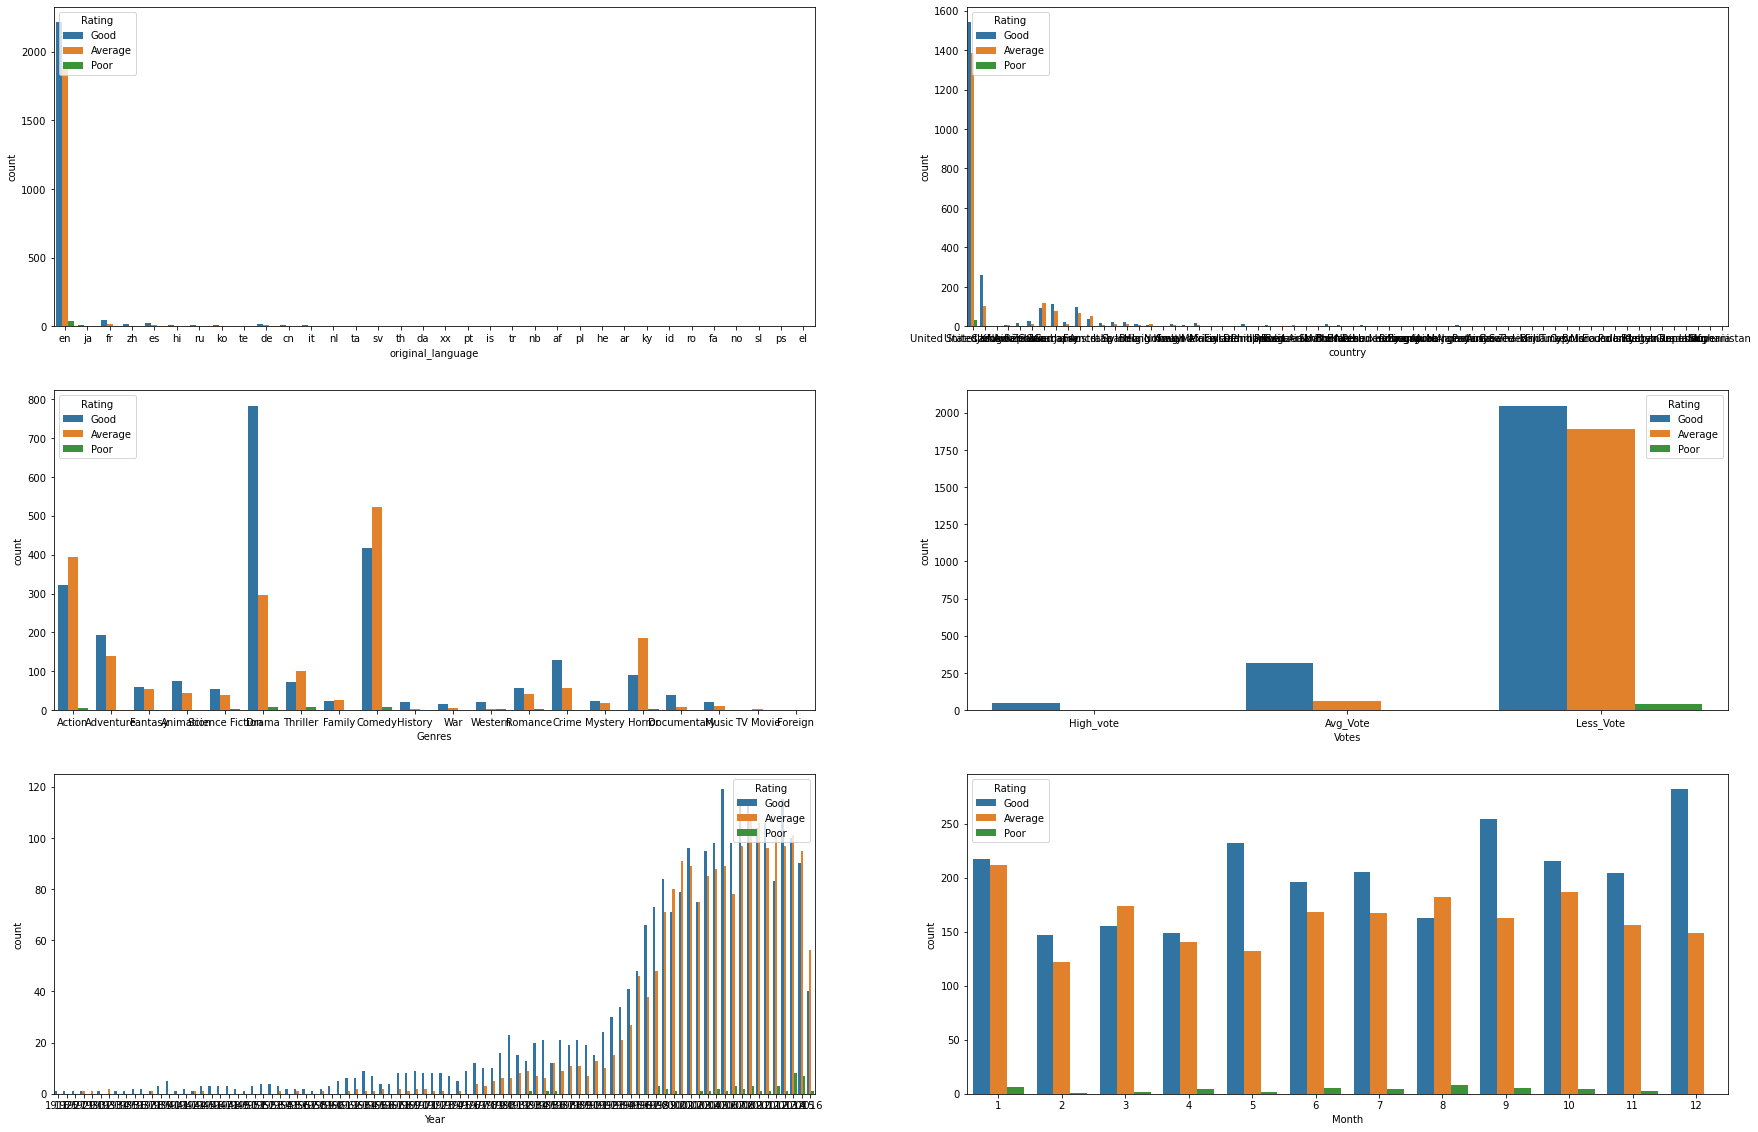

In [16]:
cat=movie_df.select_dtypes('object')
cat.drop(['Director','Main_Production_House','Second_Lead_Actor','Lead_Actor','Rating'],axis=1,inplace=True)
fig,ax=plt.subplots(3,2,figsize=(30,20))
ax=ax.ravel()
for i,j in zip(cat,range(len(cat))):
    sns.countplot(data=movie_df,x=i,hue='Rating',ax=ax[j])

In [17]:
# There are more number of average rating in action and comedy movies

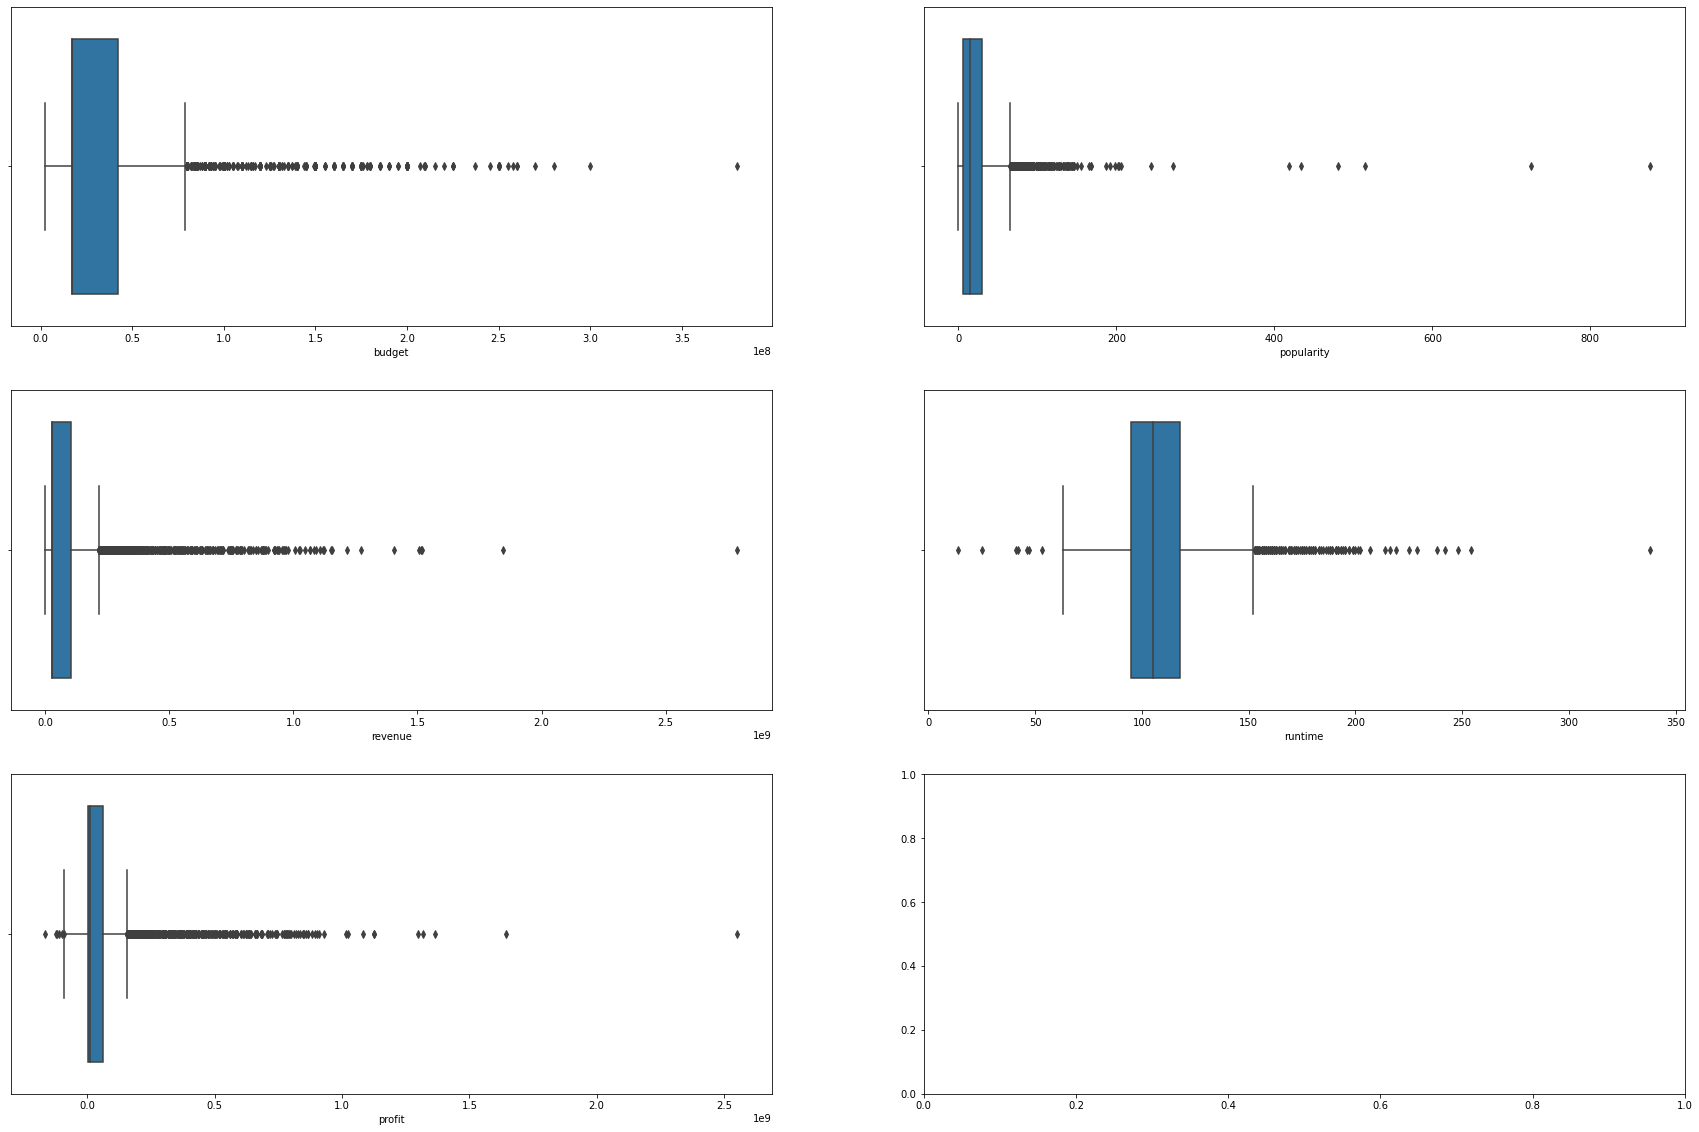

In [18]:
num=movie_df.select_dtypes(['int64','float64'])
fig,ax=plt.subplots(3,2,figsize=(30,20))
ax=ax.ravel()
for i,j in zip(num,range(len(num))):
    sns.boxplot(data=movie_df,x=i,hue='Rating',ax=ax[j])

In [19]:
# Outliers present in this are not false input of the data we keep it as it is.

In [20]:
#Converting data type object to int32
a=list(movie_df.select_dtypes('object'))
for i in a:
    movie_df[i]=LabelEncoder().fit_transform(movie_df[i])
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   budget                 4417 non-null   int64  
 1   original_language      4417 non-null   int32  
 2   popularity             4417 non-null   float64
 3   revenue                4417 non-null   int64  
 4   runtime                4417 non-null   float64
 5   country                4417 non-null   int32  
 6   Lead_Actor             4417 non-null   int32  
 7   Second_Lead_Actor      4417 non-null   int32  
 8   Main_Production_House  4417 non-null   int32  
 9   Genres                 4417 non-null   int32  
 10  Director               4417 non-null   int32  
 11  profit                 4417 non-null   int64  
 12  Votes                  4417 non-null   int32  
 13  Rating                 4417 non-null   int32  
 14  Year                   4417 non-null   int32  
 15  Mont

In [21]:
#Scalling the data to bring to a pericular scale for modelling
scaller_df=pd.DataFrame(MinMaxScaler().fit_transform(movie_df),columns=movie_df.columns)
scaller_df

,budget,original_language,popularity,revenue,runtime,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director,profit,Votes,Rating,Year,Month
0,0.621092,0.181818,0.171813,1.000000,0.456790,1.000000,0.837359,0.997985,0.463207,0.000000,0.378236,1.000000,0.5,0.5,0.920455,0.818182
1,0.788023,0.181818,0.158845,0.344696,0.478395,1.000000,0.476651,0.735590,0.958947,0.052632,0.328380,0.304310,0.0,0.5,0.897727,0.363636
2,0.642289,0.181818,0.122633,0.315884,0.413580,0.984127,0.211487,0.164047,0.199070,0.000000,0.839406,0.294987,0.0,0.5,0.988636,0.818182
3,0.655538,0.181818,0.128271,0.389151,0.466049,1.000000,0.173913,0.668279,0.525174,0.000000,0.154362,0.368336,0.5,0.5,0.954545,0.545455
4,0.682035,0.181818,0.050167,0.101916,0.364198,1.000000,0.916264,0.601370,0.958947,0.000000,0.040268,0.069883,0.0,0.0,0.954545,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,0.038156,0.181818,0.001047,0.009280,0.259259,1.000000,0.219002,0.760580,0.074361,0.315789,0.061361,0.064263,1.0,0.0,0.761364,0.727273
4413,0.038156,0.181818,0.026618,0.000152,0.194444,1.000000,0.863661,0.220879,0.890008,0.789474,0.859540,0.054896,1.0,0.5,0.863636,0.636364
4414,0.038156,0.212121,0.016296,0.000732,0.206790,0.650794,0.139560,0.390971,0.199070,0.000000,0.809684,0.055491,1.0,0.5,0.727273,0.272727
4415,0.038156,0.181818,0.001648,0.009280,0.327160,1.000000,0.288245,0.555018,0.357862,0.157895,0.849473,0.064263,1.0,0.5,0.965909,0.818182


<AxesSubplot:>

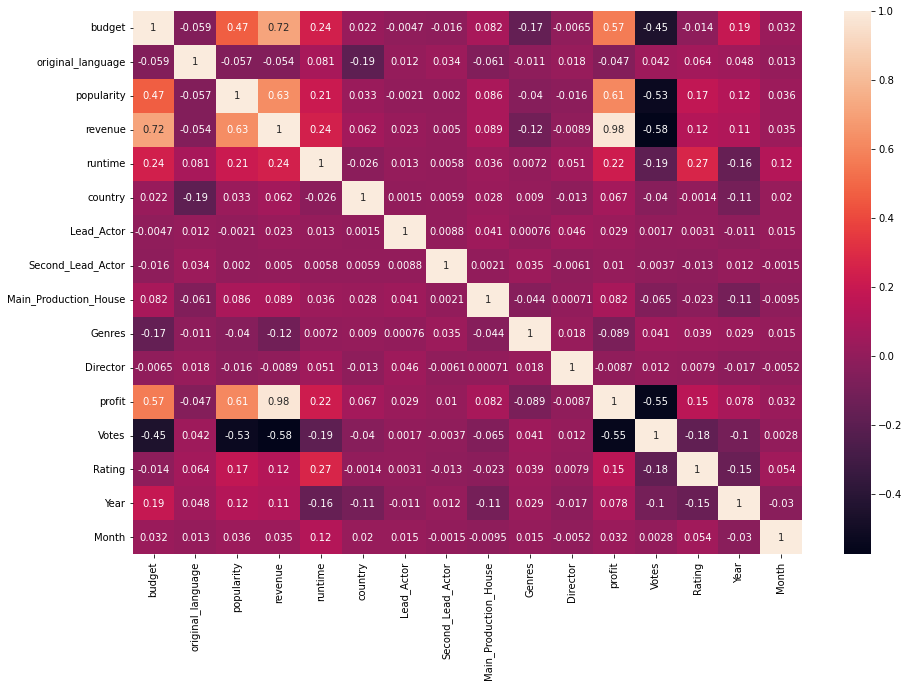

In [22]:
# Visulizing Corelation Matrix using heat map
corr_mat=scaller_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat,annot=True)

In [23]:
# Funtion to identify the corellated columns
def correlation(df,threshold):
    col_corr=set()
    correlation_matrix=df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if(abs(correlation_matrix.iloc[i,j]))>threshold:
                col_name=correlation_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [24]:
correlation(scaller_df,0.7)

{'profit', 'revenue'}

In [25]:
# Dropping Revenue column as feature reduction
scaller_df.drop('revenue',inplace=True,axis=1)

### Resampling the target column and split data into Train and Test data

<AxesSubplot:xlabel='Rating', ylabel='count'>

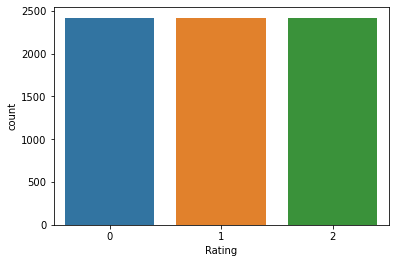

In [26]:
x1=scaller_df.drop('Rating',axis=1)
y1=movie_df.Rating

# Balancing the target feature to get accurate result while modeling 
os=SMOTE()                  
X,y=os.fit_resample(x1,y1)

sns.countplot(y)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### Logestic Regression

In [28]:
model1=LogisticRegression().fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [29]:
print('R Score for Train set  : ',model1.score(x_train,y_train))
print('R Score for Test  set  : ',model1.score(x_test,y_test))

R Score for Train set  :  0.6535812672176309
R Score for Test  set  :  0.6460055096418733


In [30]:
print('Precission Score: ', precision_score(y_test,y_pred1,average='macro'))
print('Recall Score: ',recall_score(y_test,y_pred1,average='macro'))

Precission Score:  0.6513191748786301
Recall Score:  0.6502547032266711


In [31]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred1))
print('')
print('Classification report')
print(classification_report(y_test,y_pred1))
print('')

Confusion Matrix
[[257  84 147]
 [112 300  93]
 [ 46  32 381]]

Classification report
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       488
           1       0.72      0.59      0.65       505
           2       0.61      0.83      0.71       459

    accuracy                           0.65      1452
   macro avg       0.65      0.65      0.64      1452
weighted avg       0.65      0.65      0.64      1452




### Naive_bayes

In [32]:
model2=GaussianNB().fit(x_train,y_train)
y_pred2=model2.predict(x_test)

In [33]:
print('R Score for Train set: ',model2.score(x_train,y_train))
print('R Score for Test  set: ',model2.score(x_test,y_test))

R Score for Train set:  0.5556129476584022
R Score for Test  set:  0.5275482093663911


In [34]:
print('Precission Score: ', precision_score(y_test,y_pred2,average='macro'))
print('Recall Score: ',recall_score(y_test,y_pred2,average='macro'))

Precission Score:  0.5963073689560153
Recall Score:  0.5389968135354198


In [35]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred2))
print('')
print('Classification report')
print(classification_report(y_test,y_pred2))
print('')

Confusion Matrix
[[166  37 285]
 [151 153 201]
 [ 12   0 447]]

Classification report
              precision    recall  f1-score   support

           0       0.50      0.34      0.41       488
           1       0.81      0.30      0.44       505
           2       0.48      0.97      0.64       459

    accuracy                           0.53      1452
   macro avg       0.60      0.54      0.50      1452
weighted avg       0.60      0.53      0.49      1452




### Decission Tree

In [36]:
kf=KFold(n_splits=5,random_state=42,shuffle=True)

In [37]:
# dt=DecisionTreeClassifier(random_state=42).fit(x_train,y_train)

In [38]:
# param_grid={'min_samples_split':[3,5,7,9,10,40,80,100],
#            'min_samples_leaf':[1,3,4,5,6,7,8,10,40,80,100],
#            'max_depth':[3,4,5,6,7,8,9,10],
#            'max_features':[2,3,4,5,6,7]}

In [39]:
# gridcv=GridSearchCV(dt,param_grid,cv=kf)

In [40]:
# gridcv.fit(x_train,y_train)

In [41]:
# gridcv.best_score_

In [42]:
# gridcv.best_estimator_

In [43]:
model3=DecisionTreeClassifier(max_depth=10, max_features=6, min_samples_split=5,random_state=42).fit(x_train,y_train)
y_pred3=model3.predict(x_test)

In [44]:
print('R Score for Train set: ',model3.score(x_train,y_train))
print('R Score for Test  set: ',model3.score(x_test,y_test))

R Score for Train set:  0.8546831955922864
R Score for Test  set:  0.7238292011019284


In [45]:
print('Precission Score: ', precision_score(y_test,y_pred3,average='macro'))
print('Recall Score: ',recall_score(y_test,y_pred3,average='macro'))

Precission Score:  0.7227948859794702
Recall Score:  0.7296732957341593


In [46]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred3))
print('')
print('Classification report')
print(classification_report(y_test,y_pred3))
print('')

Confusion Matrix
[[306 146  36]
 [177 308  20]
 [ 12  10 437]]

Classification report
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       488
           1       0.66      0.61      0.64       505
           2       0.89      0.95      0.92       459

    accuracy                           0.72      1452
   macro avg       0.72      0.73      0.73      1452
weighted avg       0.72      0.72      0.72      1452




### Random Forest

In [47]:
# rf=RandomForestClassifier(random_state=42).fit(x_train,y_train)

In [48]:
# param_grid={'n_estimators':[10,20,40,50,70,100,150,200],
#            'min_samples_split':[10,20,30],
#            'min_samples_leaf':[20,40,100],
#            'max_depth':[3,4,5,6,7,8,9,10]}

In [49]:
# grid_cv2=GridSearchCV(rf,param_grid,cv=kf)

In [50]:
# grid_cv2.fit(x_train,y_train)

In [51]:
# grid_cv2.best_score_

In [52]:
# grid_cv2.best_estimator_

In [53]:
model4=RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=10,n_estimators=200, random_state=42).fit(x_train,y_train)
y_pred4=model4.predict(x_test)

In [54]:
print('R Score for Train set: ',model4.score(x_train,y_train))
print('R Score for Test  set: ',model4.score(x_test,y_test))

R Score for Train set:  0.8443526170798898
R Score for Test  set:  0.7851239669421488


In [55]:
print('Precission Score: ', precision_score(y_test,y_pred4,average='macro'))
print('Recall Score: ',recall_score(y_test,y_pred4,average='macro'))

Precission Score:  0.7858973172482907
Recall Score:  0.790167061011255


In [56]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred4))
print('')
print('Classification report')
print(classification_report(y_test,y_pred4))
print('')

Confusion Matrix
[[359  97  32]
 [147 336  22]
 [ 13   1 445]]

Classification report
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       488
           1       0.77      0.67      0.72       505
           2       0.89      0.97      0.93       459

    accuracy                           0.79      1452
   macro avg       0.79      0.79      0.79      1452
weighted avg       0.78      0.79      0.78      1452




### Stacking

In [57]:
level1=[]
level1.append(('lr',LogisticRegression()))
level1.append(('KNN',KNeighborsClassifier()))
level1.append(('ny',GaussianNB()))
level1.append(('SVM',SVC()))
level1.append(('DT',DecisionTreeClassifier(max_depth=10, max_features=6, min_samples_split=5,random_state=42)))
level1.append(('RF',RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=10,n_estimators=200, random_state=42)))
level2=LogisticRegression()
stack_model=StackingClassifier(estimators=level1,final_estimator=level2,cv=kf)

In [58]:
model5=stack_model.fit(x_train,y_train)
y_pred5=model5.predict(x_test)

In [59]:
print('R Score for Train set: ',model5.score(x_train,y_train))
print('R Score for Test  set: ',model5.score(x_test,y_test))

R Score for Train set:  0.8796487603305785
R Score for Test  set:  0.8168044077134986


In [60]:
print('Precission Score: ', precision_score(y_test,y_pred5,average='macro'))
print('Recall Score: ',recall_score(y_test,y_pred5,average='macro'))

Precission Score:  0.8210648567871601
Recall Score:  0.8217607901366586


In [61]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred5))
print('')
print('Classification report')
print(classification_report(y_test,y_pred5))
print('')

Confusion Matrix
[[378 102   8]
 [151 351   3]
 [  2   0 457]]

Classification report
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       488
           1       0.77      0.70      0.73       505
           2       0.98      1.00      0.99       459

    accuracy                           0.82      1452
   macro avg       0.82      0.82      0.82      1452
weighted avg       0.82      0.82      0.82      1452




### KNN

In [62]:
score1=[]
for i in range(2,30):
    score=cross_val_score(KNeighborsClassifier(i),X,y,cv=5,scoring='accuracy')
    print(f'{i} : ',np.mean(score))
    score1.append(score)

2 :  0.727823691460055
3 :  0.7235537190082644
4 :  0.7106060606060607
5 :  0.7100550964187328
6 :  0.6977961432506887
7 :  0.6946280991735537
8 :  0.6928374655647384
9 :  0.6880165289256198
10 :  0.6836088154269973
11 :  0.681129476584022
12 :  0.6772727272727274
13 :  0.6756198347107438
14 :  0.6739669421487603
15 :  0.6702479338842975
16 :  0.6632231404958678
17 :  0.6630853994490358
18 :  0.6606060606060606
19 :  0.6575757575757576
20 :  0.6582644628099175
21 :  0.6544077134986226
22 :  0.6530303030303031
23 :  0.6534435261707989
24 :  0.6499999999999999
25 :  0.650413223140496
26 :  0.646418732782369
27 :  0.64366391184573
28 :  0.6433884297520661
29 :  0.6421487603305784


In [63]:
k=2
model6=KNeighborsClassifier(k).fit(x_train,y_train)
y_pred6=model6.predict(x_test)
y_pred6

array([1, 1, 2, ..., 2, 2, 0])

In [64]:
print('R Score for Train set: ',model6.score(x_train,y_train))
print('R Score for Test  set: ',model6.score(x_test,y_test))

R Score for Train set:  0.8684573002754821
R Score for Test  set:  0.7286501377410468


In [67]:
print('Precission Score: ', precision_score(y_test,y_pred6,average='macro'))
print('Recall Score: ',recall_score(y_test,y_pred6,average='macro'))

Precission Score:  0.7491962810333413
Recall Score:  0.737870187961687


In [68]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred6))
print('')
print('Classification report')
print(classification_report(y_test,y_pred6))
print('')

Confusion Matrix
[[404  68  16]
 [287 197  21]
 [  0   2 457]]

Classification report
              precision    recall  f1-score   support

           0       0.58      0.83      0.69       488
           1       0.74      0.39      0.51       505
           2       0.93      1.00      0.96       459

    accuracy                           0.73      1452
   macro avg       0.75      0.74      0.72      1452
weighted avg       0.75      0.73      0.71      1452


